# YBIF Internship Project - 3
-------------------------------------------------------------------------------------------------------------------------------
# Hand Written Digit Prediction - Classification Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## Import Data

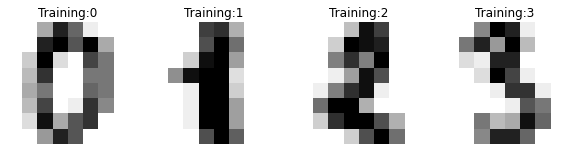

In [2]:
df=load_digits()

_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training:%i" % label)

# 
## Data Pre- processing

### Flatten Image

In [3]:
df.images.shape

(1797, 8, 8)

In [4]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
df.images[0].shape

(8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[1].shape

(8, 8)

In [8]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
data[0].shape

(64,)

In [11]:
data.shape

(1797, 64)

## Scaling Data

In [12]:
data.min()

0.0

In [13]:
data.max()

16.0

In [14]:
data=data/16
data.min()

0.0

In [15]:
data.max()

1.0

In [16]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data


In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random Forest Model


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

## Predict Test Data


In [19]:
y_pred=rf.predict(X_test)
y_pred

array([7, 6, 8, 0, 3, 6, 5, 6, 5, 1, 6, 7, 7, 8, 7, 1, 0, 3, 4, 6, 2, 7,
       6, 8, 1, 4, 8, 1, 7, 3, 1, 2, 6, 9, 7, 5, 9, 5, 1, 4, 9, 1, 3, 0,
       7, 5, 6, 6, 5, 8, 1, 1, 1, 9, 2, 0, 7, 4, 3, 1, 0, 7, 4, 1, 5, 4,
       1, 0, 4, 1, 7, 0, 2, 6, 1, 0, 8, 2, 2, 6, 1, 6, 5, 3, 8, 5, 7, 0,
       1, 5, 5, 6, 9, 2, 7, 3, 5, 1, 8, 9, 3, 4, 3, 2, 2, 2, 1, 2, 9, 9,
       8, 2, 5, 7, 0, 2, 3, 7, 7, 0, 0, 5, 1, 0, 3, 7, 9, 6, 4, 8, 0, 6,
       5, 3, 2, 4, 6, 6, 7, 5, 7, 6, 2, 5, 2, 3, 3, 7, 7, 3, 7, 9, 1, 7,
       6, 3, 1, 9, 0, 1, 0, 1, 8, 1, 8, 1, 8, 2, 5, 3, 2, 8, 2, 9, 2, 0,
       4, 5, 6, 7, 7, 6, 0, 3, 6, 9, 6, 2, 0, 9, 5, 0, 3, 5, 4, 9, 1, 8,
       6, 8, 2, 8, 1, 1, 2, 0, 7, 1, 0, 0, 6, 2, 4, 7, 2, 3, 2, 6, 9, 6,
       8, 6, 8, 9, 3, 4, 5, 6, 7, 0, 0, 1, 4, 7, 6, 6, 5, 3, 6, 0, 5, 3,
       8, 4, 3, 7, 1, 7, 6, 4, 2, 8, 1, 6, 9, 5, 5, 0, 8, 5, 5, 9, 9, 9,
       2, 1, 7, 1, 8, 3, 8, 1, 7, 8, 3, 2, 5, 2, 5, 4, 9, 2, 2, 3, 2, 6,
       4, 0, 2, 7, 0, 2, 2, 0, 8, 5, 9, 1, 2, 1, 1,

## Model Accuracy


In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
confusion_matrix(y_test,y_pred)

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 60,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  4,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 48,  2],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  2, 47]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.97      0.99      0.98        67
           2       1.00      1.00      1.00        60
           3       1.00      0.91      0.95        53
           4       0.98      0.98      0.98        46
           5       0.88      0.96      0.91        45
           6       0.98      1.00      0.99        61
           7       0.96      1.00      0.98        51
           8       0.94      0.94      0.94        51
           9       0.96      0.92      0.94        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

